# Load Library

In [215]:
!pip install jovian
import jovian
jovian.commit()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


In [76]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from wordcloud import WordCloud
import re
import gensim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,f1_score

# Load Dataset

In [181]:
import pandas as pd
url='https://drive.google.com/file/d/16UmG2L6RkaDoynNLAlw7aTzqru2djHCq/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
#df = pd.read_csv(url)
df = pd.read_csv(url,  encoding='latin-1')

In [182]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


# EDA

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [80]:
print('shape of train dataset',df.shape)
df.Sentiment.value_counts()

shape of train dataset (41157, 6)


Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

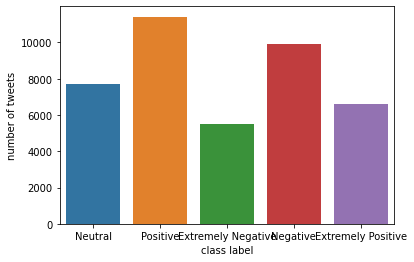

In [81]:
# 
sns.countplot(df.Sentiment,)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

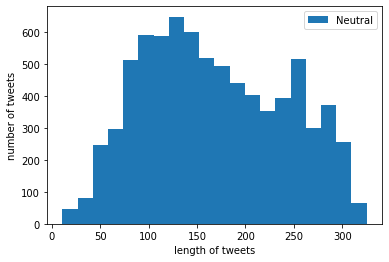

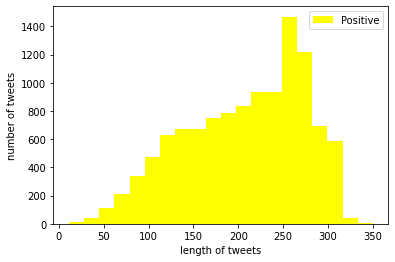

In [82]:
plt.hist(df[df['Sentiment']=='Neutral'].OriginalTweet.str.len(),bins=20,label='Neutral')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()
plt.hist(df[df['Sentiment']=='Positive'].OriginalTweet.str.len(),color='yellow',bins=20,label='Positive')
plt.legend()
plt.xlabel('length of tweets')
plt.ylabel('number of tweets')
plt.show()

In [83]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [84]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [85]:
df1 = df.dropna()
df1

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


In [86]:
df1.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [88]:
df = df1

All nan values are removed from dataframe

# Preprocessing Tweet Text
Removing Twitter Handles (@user)

Removing urls from text

Removing Punctuations, Numbers, and Special Characters

Convert the word to lowercase

Remove Stopwords

Stemming the word

Lemmatization

After which we collect the words used to describe positive and negative reviews

In [89]:
text=df['OriginalTweet'].values.tolist()
print(len(text))

32567


In [90]:
import nltk
nltk.download('stopwords')
stopword=nltk.corpus.stopwords.words('english')
stopword.remove('not')
for index,text_ in enumerate(text):
    text_=re.sub(r'@[\w]*','',text_) #Removing Twitter Handles (@user)
    text_=re.sub(r'http/S+','',text_) #Removing urls from text 
    text_=re.sub(r'[^A-Za-z#]',' ',text_) #Removing Punctuations, Numbers, and Special Characters
    text_=" ".join(i.lower() for i in text_.split() if i.lower() not in stopword) #Removing stopword
    text[index]=text_

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
#Stemming the word
nltk.download('wordnet')
pt=PorterStemmer()
wordnet=WordNetLemmatizer()
for index,text_ in enumerate(text):
    text_=" ".join(pt.stem(i) for i in text_.split())
    text_=" ".join(wordnet.lemmatize(i) for i in text_.split())  
    text[index]=text_

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [92]:
df['preprocess_tweet']=text[:len(df)]
df['length_tweet']=df['preprocess_tweet'].str.len()
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,preprocess_tweet,length_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,http co ifz fan pa http co xx ghgfzcc http co ...,53
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...,176
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...,105
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,news region first confirm covid case came sull...,169
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cashier groceri store share insight #covid pro...,105


In [93]:
df.nunique()

UserName            32567
ScreenName          32567
Location            12220
TweetAt                30
OriginalTweet       32567
Sentiment               5
preprocess_tweet    32510
length_tweet          265
dtype: int64

In [94]:
from sklearn.preprocessing import OneHotEncoder

In [95]:
encoder=OneHotEncoder()

In [96]:
df['TweetAt']=pd.to_datetime(df['TweetAt'])

In [97]:
df['year']=df.TweetAt.dt.year

In [98]:
df['month']=df.TweetAt.dt.month

In [99]:
df['day']=df.TweetAt.dt.day

In [100]:
df['WeekOfYear']=df.TweetAt.dt.isocalendar().week

#**Featurization** 

### BOW

In [104]:
train=df.copy()
train.drop(columns=['UserName','ScreenName','Location','TweetAt','OriginalTweet','preprocess_tweet'],inplace=True)

In [116]:
import numpy as np

In [114]:
bow=CountVectorizer( min_df=2, max_features=1000)
bow.fit(df['preprocess_tweet'])
bow_df=bow.transform(df['preprocess_tweet']).toarray()
print('feature name==',bow.get_feature_names()[:10])
print('number of uniqe words',bow_df.shape[1])
print('shape',bow_df.shape)
bow_train=pd.DataFrame(bow_df)
bow_train['length_tweet']=np.array(df['length_tweet'])
bow_train['Sentiment']=np.array(df['Sentiment'])
bow_train['year']=np.array(df.year)
bow_train['month']=np.array(df['month'])
bow_train['day']=np.array(df['day'])
bow_train['WeekOfYear']=np.array(df['WeekOfYear'])
bow_train.head()

feature name== ['abl', 'absolut', 'access', 'accord', 'account', 'across', 'act', 'action', 'activ', 'actual']
number of uniqe words 1000
shape (32567, 1000)


,0,1,2,3,4,5,6,7,8,9,...,996,997,998,999,length_tweet,Sentiment,year,month,day,WeekOfYear
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,53,Neutral,2020,3,16,12
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,176,Positive,2020,3,16,12
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,105,Positive,2020,3,16,12
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,169,Positive,2020,3,16,12
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,105,Positive,2020,3,16,12


In [117]:
bow_train

,0,1,2,3,4,5,6,7,8,9,...,996,997,998,999,length_tweet,Sentiment,year,month,day,WeekOfYear
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,53,Neutral,2020,3,16,12
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,176,Positive,2020,3,16,12
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,105,Positive,2020,3,16,12
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,169,Positive,2020,3,16,12
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,105,Positive,2020,3,16,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,51,Negative,2020,4,14,16
32563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,113,Negative,2020,4,14,16
32564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,121,Positive,2020,4,14,16
32565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,80,Neutral,2020,4,14,16


In [118]:
bow_train.isna().sum()

0             0
1             0
2             0
3             0
4             0
             ..
Sentiment     0
year          0
month         0
day           0
WeekOfYear    0
Length: 1006, dtype: int64

### TF-IDF Features (Bi-Grams)

In [120]:
tfidf=TfidfVectorizer(ngram_range=(1, 2),min_df=2,max_features=1000)
tfidf.fit(df['preprocess_tweet'])
tfidf_df=tfidf.transform(df['preprocess_tweet']).toarray()
print('number of uniqe words',bow_df.shape[1])
print('shape',tfidf_df.shape)
tfidf_train=pd.DataFrame(tfidf_df)
tfidf_train['length_tweet']=np.array(df['length_tweet'])
tfidf_train['Sentiment']=np.array(df['Sentiment'])
tfidf_train['year']=np.array(df.year)
tfidf_train['month']=np.array(df['month'])
tfidf_train['day']=np.array(df['day'])
tfidf_train['WeekOfYear']=np.array(df['WeekOfYear'])
tfidf_train.head()

number of uniqe words 1000
shape (32567, 1000)


,0,1,2,3,4,5,6,7,8,9,...,996,997,998,999,length_tweet,Sentiment,year,month,day,WeekOfYear
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,53,Neutral,2020,3,16,12
1,0.0,0.0,0.0,0.0,0.247125,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,176,Positive,2020,3,16,12
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,105,Positive,2020,3,16,12
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,169,Positive,2020,3,16,12
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,105,Positive,2020,3,16,12


### Word2vec
size: The number of dimensions of the embeddings and the default is 100.

window: The maximum distance between a target word and words around the target word. The default window is 5.

min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

workers: The number of partitions during training and the default workers is 3.

sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [121]:
tokenize=df['preprocess_tweet'].apply(lambda x: x.split())
w2vec_model=gensim.models.Word2Vec(tokenize,min_count = 1, size = 100, window = 5, sg = 1)
w2vec_model.train(tokenize,total_examples= len(df['preprocess_tweet']),epochs=20)

(11335992, 13082940)

In [122]:
w2vec_model.most_similar('food')

[('wiltshir', 0.7491826415061951),
 ('lanarkshir', 0.727031409740448),
 ('rabi', 0.7229454517364502),
 ('tumultu', 0.7197182178497314),
 ('maritim', 0.7180218696594238),
 ('castoff', 0.713070273399353),
 ('#safest', 0.7130693197250366),
 ('anchorag', 0.708795428276062),
 ('islington', 0.7072023153305054),
 ('#terribl', 0.7053380012512207)]

In [123]:
w2v_words = list(w2vec_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  55638
sample words  ['http', 'co', 'ifz', 'fan', 'pa', 'xx', 'ghgfzcc', 'nlzdxno', 'advic', 'talk', 'neighbour', 'famili', 'exchang', 'phone', 'number', 'creat', 'contact', 'list', 'school', 'employ', 'chemist', 'gp', 'set', 'onlin', 'shop', 'account', 'po', 'adequ', 'suppli', 'regular', 'med', 'not', 'order', 'coronaviru', 'australia', 'woolworth', 'give', 'elderli', 'disabl', 'dedic', 'hour', 'amid', 'covid', 'outbreak', 'binca', 'vp', 'p', 'news', 'region', 'first']


In [124]:
vector=[]
from tqdm import tqdm
for sent in tqdm(tokenize):
  sent_vec=np.zeros(100)
  count =0
  for word in sent: 
    if word in w2v_words:
      vec = w2vec_model.wv[word]
      sent_vec += vec 
      count += 1
  if count != 0:
    sent_vec /= count #normalize
  vector.append(sent_vec)
print(len(vector))
print(len(vector[0]))    

100%|██████████| 32567/32567 [01:14<00:00, 437.14it/s]

32567
100


In [125]:
#example
l='father dysfunct selfish drag kid dysfunct'
count=0
vcc=np.zeros(100)
for word in l:
  if word in w2v_words:
    v=w2vec_model.wv[word]
    vcc+=v
    count+=1
vcc

array([-4.56148284e+00, -4.96649890e+00,  1.72271610e+01, -3.26113451e+00,
        1.78627758e+01, -1.13430767e+01, -2.07123724e+01, -2.74562752e+00,
       -7.61984190e+00,  3.08899716e+00,  7.93307300e+00, -2.61540692e+01,
        9.10376851e+00, -1.02504280e+01,  4.67921015e+00, -4.79389682e+00,
        1.77479901e+01,  3.09656736e-01,  2.19384008e+01,  1.65188366e+01,
       -7.56337796e+00,  1.06549658e+01, -8.64317360e+00,  1.60411267e+00,
       -7.04680350e-01, -4.87771915e+00, -6.92659713e+00,  5.25537850e+00,
        6.63225025e-01,  2.36015816e+00,  2.77653921e+00,  1.93274938e+01,
        8.27768594e-01,  3.97318505e+00,  1.64075614e+01,  6.78988571e+00,
        1.33810654e+01,  6.74468130e+00, -2.54299788e+00, -1.30757569e+01,
        2.61061310e+00, -1.08182721e+01,  1.19597821e+01,  2.07013631e+00,
        7.87870263e+00,  3.77140492e-02,  9.82891768e-02,  7.81265210e+00,
       -5.30691568e+00, -8.92798540e+00, -2.41812114e+01, -4.10258424e+00,
        2.96359893e+00, -

In [126]:

print('number of uniqe words',len(vector[1]))
w2v_train=pd.DataFrame(vector)
w2v_train['length_tweet']=df['length_tweet']
w2v_train['Sentiment']=df['Sentiment']
w2v_train.head()

number of uniqe words 100


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,length_tweet,Sentiment
0,-0.015901,-0.149313,0.160113,0.102394,0.280778,0.049077,-0.399826,-0.044985,0.064507,-0.045493,...,-0.096866,-0.292212,0.019912,-0.155425,0.257137,-0.024148,0.280398,-0.072491,53.0,Neutral
1,0.013221,0.255049,0.014441,-0.587652,0.001092,0.386930,-0.310230,-0.309303,-0.355213,-0.181398,...,0.355882,-0.210562,0.029873,-0.213545,0.057365,0.026013,0.366004,-0.187447,176.0,Positive
2,0.075185,0.068029,0.041353,-0.127758,0.013547,0.234037,-0.287432,-0.030400,-0.291800,-0.387338,...,0.371602,-0.571808,0.098420,-0.472115,0.003979,0.114939,0.393004,-0.226489,105.0,Positive
3,0.071168,0.257675,0.019314,-0.526924,-0.024667,0.383286,-0.300943,-0.151025,-0.163519,-0.241386,...,0.358670,-0.423784,0.116248,-0.519033,-0.042340,-0.162445,0.351281,-0.115990,NaN,NaN
4,-0.074955,0.135403,-0.146035,-0.299875,-0.039394,0.157081,-0.492617,-0.222856,-0.169672,-0.290725,...,0.456024,-0.152354,-0.046107,-0.423642,0.126064,-0.166120,0.462645,-0.251480,NaN,NaN


# Resample

## Upsampling TF-IDF

In [132]:
major_class_0=tfidf_train.Sentiment.value_counts()
df_major=tfidf_train[tfidf_train['Sentiment']=='Positive']
df_minor=tfidf_train[tfidf_train['Sentiment']=='Neutral']
df_minor_upsampled = resample(df_minor, 
                                 replace=True     # sample with replacement)
df_tfidf_upsampled = pd.concat([df_major, df_minor_upsampled])
print('shape',df_tfidf_upsampled.shape)
sns.countplot(df_tfidf_upsampled.Sentiment)

SyntaxError: ignored

# Split Dataset

In [148]:
df1 = tfidf_train.dropna()
df1

,0,1,2,3,4,5,6,7,8,9,...,996,997,998,999,length_tweet,Sentiment,year,month,day,WeekOfYear
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,53,Neutral,2020,3,16,12
1,0.0,0.0,0.0,0.0,0.247125,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,176,Positive,2020,3,16,12
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,105,Positive,2020,3,16,12
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,169,Positive,2020,3,16,12
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,105,Positive,2020,3,16,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,51,Negative,2020,4,14,16
32563,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,113,Negative,2020,4,14,16
32564,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,121,Positive,2020,4,14,16
32565,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,80,Neutral,2020,4,14,16


In [134]:
df1.isnull().sum().sum()

0

In [149]:
tfidf_train = df1

In [153]:
new_col=tfidf_train.select_dtypes(include=np.number).columns.tolist()
print(new_col)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [151]:
x=tfidf_train[new_col]
y=tfidf_train['Sentiment']
x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf=train_test_split(x,y,test_size=0.2)

In [184]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50,whiten=True,random_state=0)
pca.fit(x_train_tfidf)
x_train_tfidf1=pd.DataFrame(pca.transform(x_train_tfidf))
x_test_tfidf1=pd.DataFrame(pca.transform(x_test_tfidf))

In [186]:
x_train_tfidf1

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.127918,0.372824,0.395852,-1.262655,2.893984,0.065765,-0.615103,-0.157817,0.184238,-0.135877,...,-0.115131,-0.458064,-0.065856,-0.193215,-0.194817,-0.052902,-0.005436,0.134646,-0.225483,-0.373022
1,0.255184,1.163412,-0.422359,-0.423626,-1.577188,-0.657362,-2.591915,0.573287,0.931091,-0.134176,...,-0.804814,-0.318594,0.432218,1.064612,0.538684,-0.254673,-0.075192,-0.104478,-0.445469,-0.788306
2,-0.015215,0.825008,-0.070199,0.108183,3.145266,-0.179345,-0.961133,-0.215150,-0.219196,-0.780437,...,-0.111729,-0.452296,0.191801,-0.117226,0.022493,-0.268388,-0.203515,-0.333787,-0.316530,-0.658584
3,1.381323,-1.312958,-0.198235,0.034518,-0.211379,-1.482244,2.699035,3.226714,1.036551,-1.482844,...,-0.567948,-1.003177,-0.026097,-2.432898,-1.790215,-0.975195,0.655439,-0.065931,1.114090,0.106614
4,0.728010,-1.238640,1.457201,-1.184298,1.422886,-0.130884,-0.127140,0.884858,0.015026,0.012715,...,-1.701391,0.422444,-0.343389,1.361565,0.571916,-1.758953,-0.105229,-1.937959,-0.590344,-0.995292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26048,0.277635,0.484372,0.272666,1.443344,0.046665,-0.415720,0.115554,0.262703,-0.624241,0.308766,...,0.910391,-0.115258,2.396668,1.807308,-1.305980,-1.933075,-1.180169,-0.055646,-1.863140,-0.929920
26049,0.187582,1.050533,-0.305693,-0.640723,-0.760443,-0.721299,0.413429,0.985779,-0.253556,-0.355327,...,0.071160,-1.231374,-0.414924,2.621032,-2.015282,1.489205,-0.134019,-0.275848,0.839415,0.954404
26050,0.908455,0.368820,0.379539,-0.802810,-0.177446,-0.543646,-0.040077,-0.519295,-0.983851,-0.140125,...,-0.829069,0.421423,0.319253,-0.722613,1.383912,0.003733,-2.578773,-2.139468,-0.930877,-0.382412
26051,0.254832,-1.308623,-0.180911,-0.128356,-0.157483,0.049825,0.094426,-0.144295,0.041744,0.278376,...,-1.175624,0.706097,-0.425717,0.293066,0.782501,0.536886,0.747611,1.533503,-0.854377,0.229298


# Model Selection

In [154]:
def f1_score_(y_proba,y_test):
  proba = y_proba[:,1] >= 0.3
  proba = proba.astype(np.int) 
  return f1_score( proba,y_test)   


## KNN

In [156]:
#use tfidf
from sklearn.neighbors import KNeighborsClassifier
k=[11]
accuracy_tfidf=[]
for i in k:
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train_tfidf,y_train_tfidf)
  y_pred=model.predict(x_test_tfidf)
  acc=accuracy_score(y_pred,y_test_tfidf)
  print('for k=',i,'Accuracy Score',acc)
  accuracy_tfidf.append(acc)
  y_proba=model.predict_proba(x_test_tfidf)
  f1_scor=f1_score_(y_proba,y_test_tfidf)
  print('for k=',i,'f1 score ',f1_scor)

for k= 11 Accuracy Score 0.2692661958857845


ValueError: ignored

In [192]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train_tfidf1,y_train_tfidf)

KNeighborsClassifier(n_neighbors=1)

In [193]:
model.score(x_train_tfidf1,y_train_tfidf)

0.9999616167044102

In [194]:
model.score(x_test_tfidf1,y_test_tfidf)

0.3354313785692355

In [198]:
from sklearn.naive_bayes import GaussianNB

In [199]:
clf=GaussianNB()

In [200]:
clf.fit(x_train_tfidf1,y_train_tfidf)

GaussianNB()

In [201]:
clf.score(x_train_tfidf1,y_train_tfidf)

0.363796875599739

In [202]:
from sklearn.svm import SVC

In [203]:
classifier=SVC(kernel='poly',random_state=42)

In [204]:
classifier.fit(x_train_tfidf1,y_train_tfidf)

SVC(kernel='poly', random_state=42)

In [206]:
classifier.score(x_train_tfidf1,y_train_tfidf)

0.5977046789237324

In [207]:
classifier.score(x_test_tfidf1,y_test_tfidf)

0.37749462695732267

In [209]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [210]:
from xgboost import XGBClassifier

In [211]:
model=XGBClassifier(random_state=42,n_jobs=-1,n_estimators=100,max_depth=10,learning_rate=0.3)


In [212]:
model.fit(x_train_tfidf1,y_train_tfidf)

XGBClassifier(learning_rate=0.3, max_depth=10, n_jobs=-1,
              objective='multi:softprob', random_state=42)

In [213]:
model.score(x_train_tfidf1,y_train_tfidf)

0.9999616167044102

In [214]:
model.score(x_test_tfidf1,y_test_tfidf)

0.4052809333742708

In [208]:
!pip install jovian
import jovian
jovian.commit()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.4 MB/s 
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6503 sha256=862ba1a0ae6f658b640cfa59676134f0b16d7f353397edcf15a854d43e154b36
  Stored in directory: /root/.cache/pip/wheels/2a/ea/87/dd57f1ecb4f0752f3e1dbf958ebf8b36d920d190425bcdc24d
Successfully built uuid


[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab
